## Set up

In [1]:
%run -i Mid-Term-Project/notebooks/functions.py
%run -i ~/Coding/custom_functions/lighthouse_labs/ML_functions.py

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
master_df = pd.read_csv('Mid-Term-Project/processed_data/master.csv')

#split out lat, long info
X = master_df.iloc[:, 2:]
lat_lng = master_df.iloc[:, 0:2]

In [5]:
#Scaling the data
scaler = StandardScaler()
#fit scaler to data
scaler.fit(X.values)

#transform and save into new dataframe
X_std = pd.DataFrame(scaler.transform(X.values), 
                                columns = X.columns)
    
X_std.head()

,Population,traffic,DAY CARE,HOSPITALS AND CLINICS,PUBLIC K-12 SCHOOLS,buildings,legalstories,rating,price
0,-0.837351,-0.637258,-0.643445,-1.065555,-1.009000,-0.398179,-0.255689,-0.289246,0.780088
1,-0.636818,-0.119831,-0.758136,-0.716633,-1.009000,-0.541888,-0.968278,-1.232947,0.416751
2,-0.952083,0.069818,-0.987518,-1.065555,-0.797435,-0.541888,-0.968278,-1.182391,0.537863
3,-1.886269,-0.795459,-1.331591,-1.065555,-1.643693,-0.541888,-0.968278,-1.401464,1.022312
4,-0.054161,0.075751,-0.299373,-1.065555,-0.374306,-0.444673,-0.252915,-0.777948,0.416751


## Radar Plots

### K-means

In [6]:
k = 5
model = KMeans(n_clusters=k, init='k-means++', random_state=1)
## clustering
clusters = model.fit_predict(X_std)

#Create dataframe with scaled data and cluster info
cluster_df = pd.concat([X_std, pd.DataFrame(clusters)], axis=1)
cluster_df = cluster_df.rename(columns = {0: 'clusters'})

In [7]:
df_list = []
X_plt = pd.concat([lat_lng, cluster_df], axis=1)
#for each cluster seperate from master dataframe and append to list
for i in range(0, k):
    df_list.append(X_plt.loc[X_plt['clusters'] == i])

#zip each clustered dataframe in the list
cluster_dfs = llz_set(df_list)

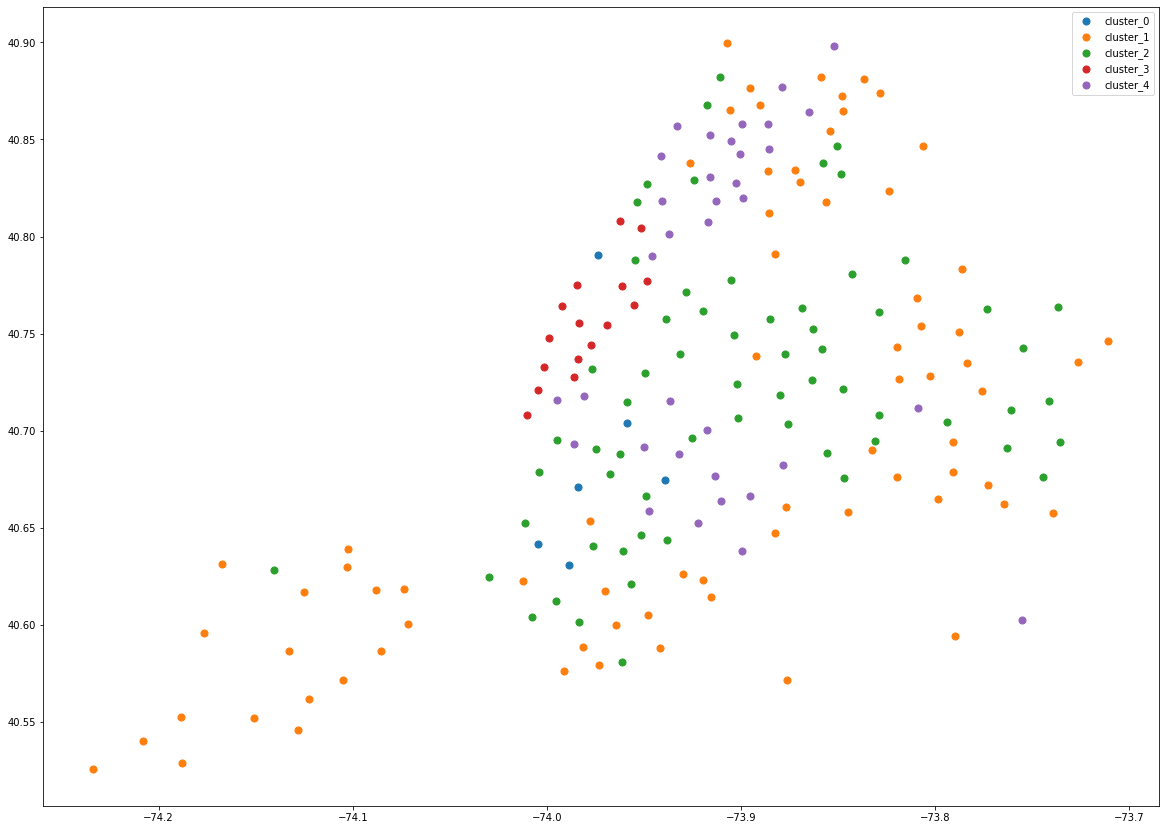

In [8]:
fig,ax=plt.subplots(figsize=(20,20))

#loop through each cluster
for i in range(len(cluster_dfs)):
    cluster_dfs[i].plot(ax = ax, markersize = 50, marker = 'o', label = f"cluster_{i}")
plt.legend()

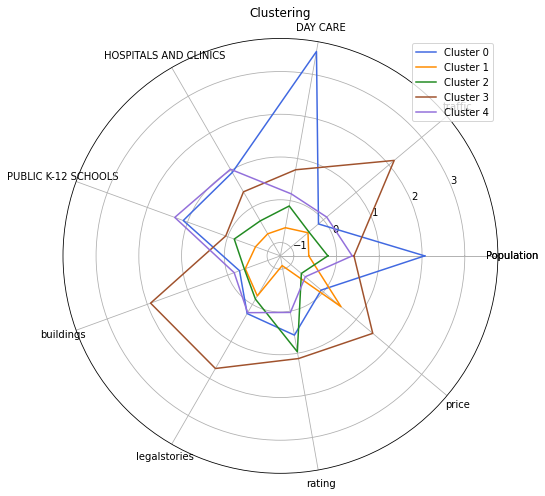

In [13]:
radar_plot(X_std, clusters, save='Mid-Term-Project/figures/cluster_plotv2.png')